In [47]:
import networkx as nx
import pandas as pd
import numpy as np
from networkx.algorithms import bipartite
from cProfile import label
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
%matplotlib inline

In [48]:
def plot_degree_dist(G):
    
    degrees = [G.degree(n, weight = 'weight') for n in G.nodes()]
    kmin = min(degrees)
    kmax = max(degrees)
    
    if kmin>0:
        bin_edges = np.logspace(np.log10(kmin), np.log10(kmax)+1, num=20)
    else:
        bin_edges = np.logspace(0, np.log10(kmax)+1, num=20)
    density, _ = np.histogram(degrees, bins=bin_edges, density=True)

    print(bin_edges)
    print(density)
    
    fig = plt.figure(figsize=(20,20))

    log_be = np.log10(bin_edges)
    x = 10**((log_be[1:] + log_be[:-1])/2)
    plt.loglog(x, density, marker='o', linestyle='none')
    plt.xlabel(r"degree $k$", fontsize=16)
    plt.ylabel(r"$P(k)$", fontsize=16)

    ax = plt.gca()
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.yaxis.set_ticks_position('left')
    ax.xaxis.set_ticks_position('bottom')

In [49]:
df = pd.read_csv('../data/taxon-importer.csv', header=0)
G = nx.Graph()  # or DiGraph, MultiGraph, MultiDiGraph, etc

taxons = {}
purpose = {}
       
for index, row in df.iterrows():
    if(row['Taxon'] not in taxons):
        purpose = {}
    
    if(row['Purpose'] == "B"):
        purposeCode = "Breeding"
    if(row['Purpose'] == "E"):
        purposeCode = "Educational"
    if(row['Purpose'] == "G"):
        purposeCode = "Garden"
    if(row['Purpose'] == "H"):
        purposeCode = "Hunting"
    if(row['Purpose'] == "L"):
        purposeCode = "Law"
    if(row['Purpose'] == "M"):
        purposeCode = "Medical"
    if(row['Purpose'] == "R"):
        purposeCode = "Reintroduction to wild"
    if(row['Purpose'] == "P"):
        purposeCode = "Personal"
    if(row['Purpose'] == "Q"):
        purposeCode = "Circus"
    if(row['Purpose'] == "S"):
        purposeCode = "Scientific"
    if(row['Purpose'] == "T"):
        purposeCode = "Commercial"
    if(row['Purpose'] == "Z"):
        purposeCode = "Zoo"
    if(row['Purpose'] == "Unspecified"):
        purposeCode = "Unspecified"
        
    # purposeDetails = {purposeCode: "X"}
        
    # purpose.update(purposeDetails)
    # attributes = {"Purpose": purpose}

    # taxons.update({row['Taxon']: row['Taxon']})
    # G.add_node(row['Importer'], **attributes)
    
    if G.has_node(row['Importer']):
        if purposeCode not in G.nodes[row['Importer']]['purpose']:  
            G.nodes[row['Importer']]['purpose'].append(purposeCode)
    else:
        purpose = [purposeCode]
        G.add_node(row['Importer'], purpose = [purposeCode])

df2 = df.drop_duplicates(['Taxon', 'Importer'])
for i, group in df2.groupby(['Taxon'])['Importer']: #https://stackoverflow.com/questions/35089255/pandas-reshape-dataframe-to-edge-list-according-to-column-values
    # generate all combinations without replacement 
    # from the group of similar column pairs
    for u, v in itertools.combinations(group, 2):
        if(G.has_edge(u,v)):
            G[u][v]['weight'] += 1
        else:
            G.add_edge(u, v, weight = 1)

nx.write_gml(G,"importer-importer-taxon.gml")


Number of nodes:  111
Number of edges:  3580

Weighted average degree: 751.3873873873874
Minimum degree:  1
Maximum degree:  4066
[1.00000000e+00 1.74818648e+00 3.05615596e+00 5.34273052e+00
 9.34008925e+00 1.63282177e+01 2.85447694e+01 4.99015799e+01
 8.72372672e+01 1.52507011e+02 2.66610694e+02 4.66085210e+02
 8.14803861e+02 1.42442909e+03 2.49016768e+03 4.35327746e+03
 7.61034079e+03 1.33042949e+04 2.32583884e+04 4.06600000e+04]
[4.81645113e-02 6.88778227e-03 0.00000000e+00 0.00000000e+00
 7.73512597e-03 2.94977150e-03 2.53099844e-03 3.13686785e-03
 1.38027339e-03 7.89545855e-04 5.87128218e-04 2.58346061e-04
 1.62557411e-04 1.09892913e-04 4.83546868e-05 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00]


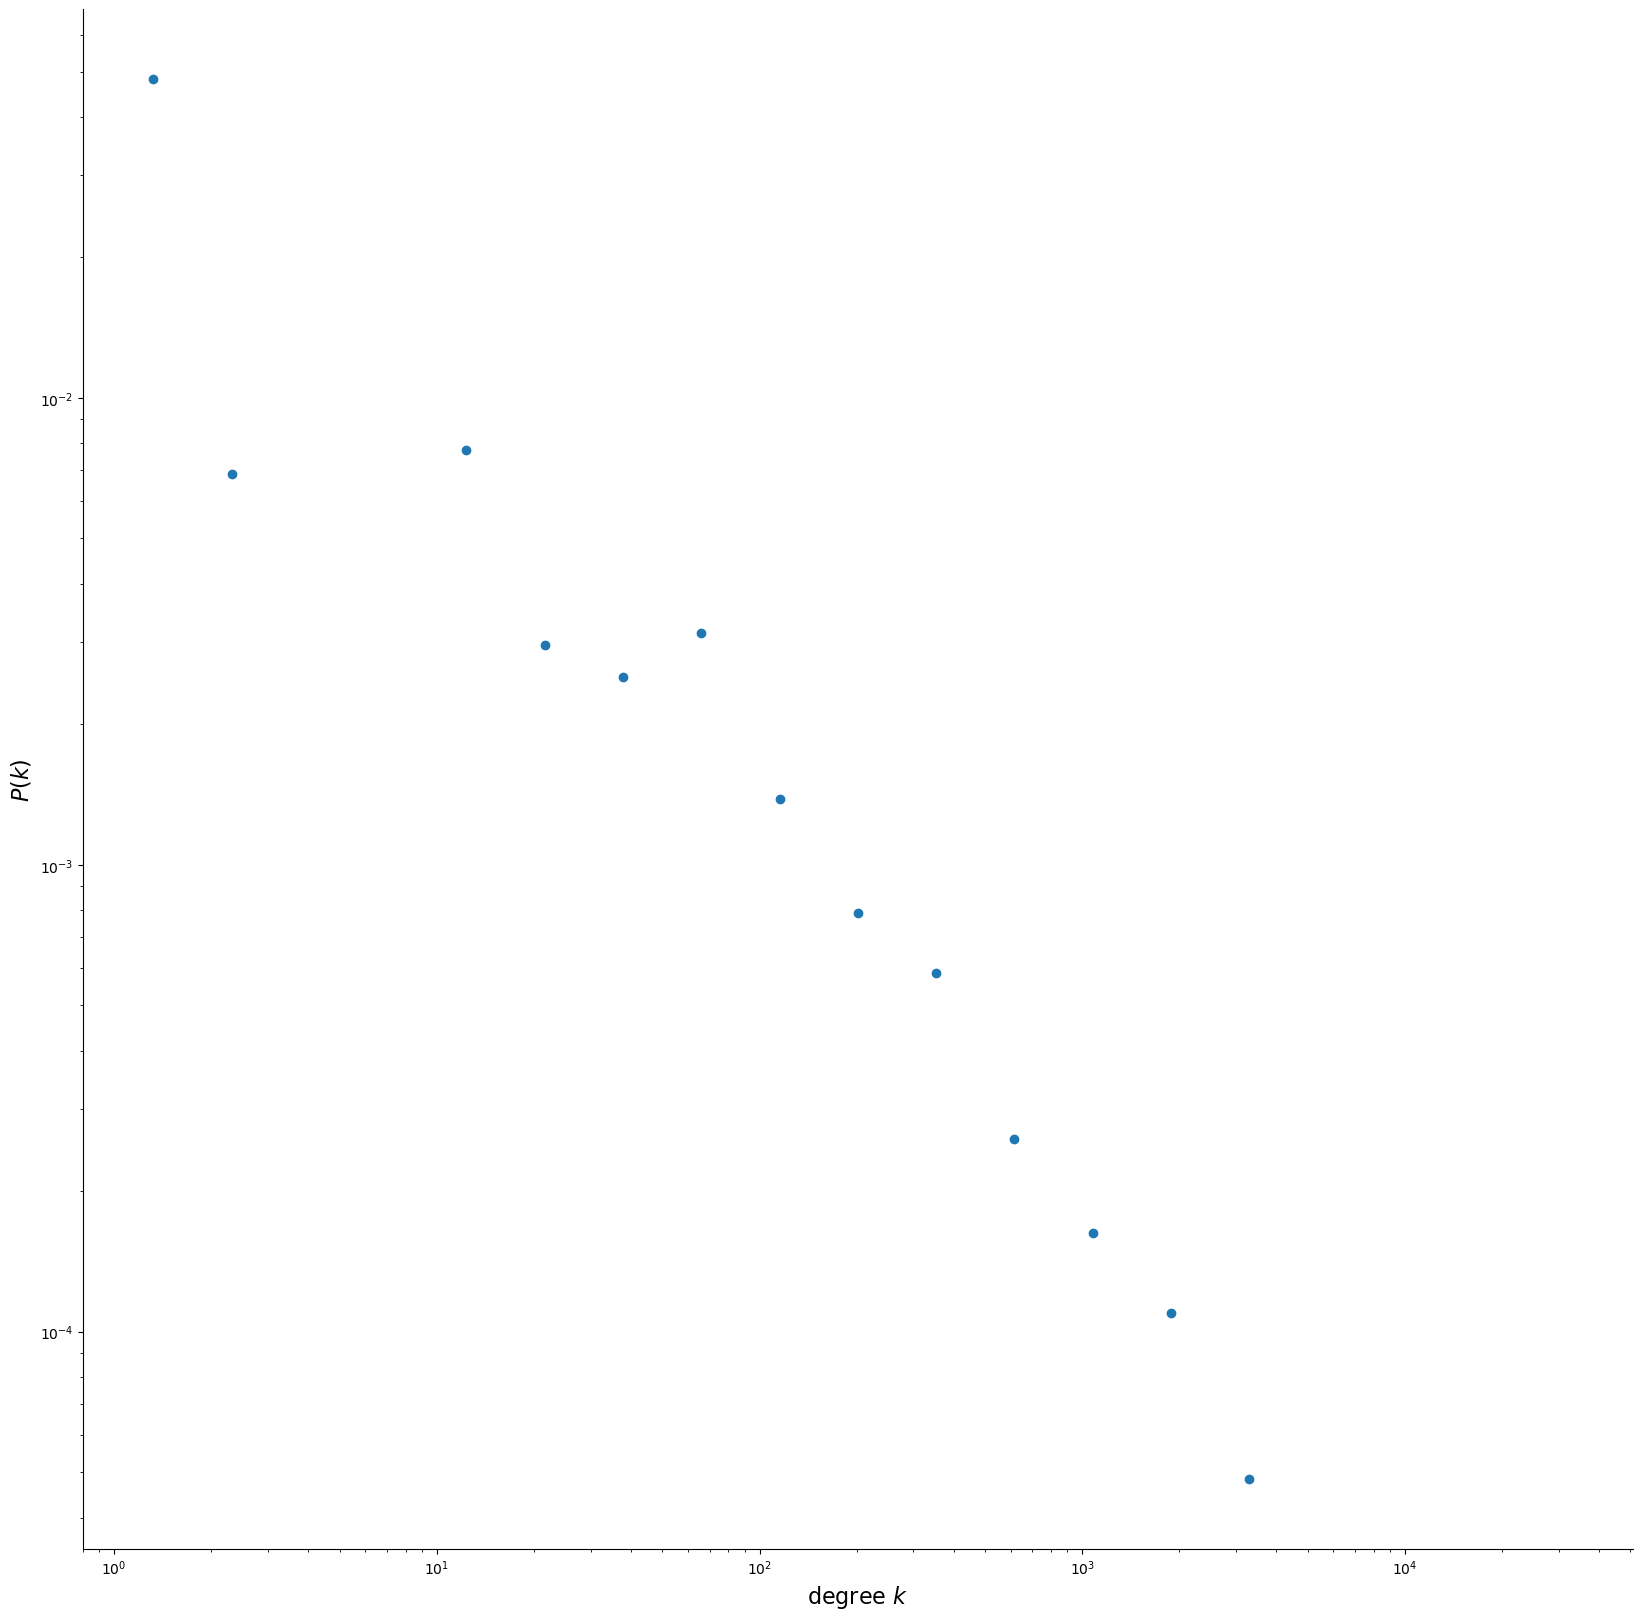

In [50]:
degrees = [G.degree(n, weight = 'weight') for n in G.nodes()]
print("Number of nodes: ", G.number_of_nodes())
print("Number of edges: ", G.number_of_edges())
print()
print("Weighted average degree:", np.mean(degrees))
print("Minimum degree: ", min(degrees))
print("Maximum degree: ", max(degrees))
print()
plot_degree_dist(G)

In [51]:
print("Unweighted average Clustering Coefficient: ", np.mean(list(nx.clustering(G).values())))

print("Weighted average clustering coefficient: ", nx.average_clustering(G, weight='weight'))

print("Number of connected components: ", nx.number_connected_components(G))

print("Average shortest path length: ", nx.average_shortest_path_length(G))

Unweighted average Clustering Coefficient:  0.8393238799153876
Weighted average clustering coefficient:  0.0201097042211599
Number of connected components:  1
Average shortest path length:  1.424078624078624
